In [1]:
%matplotlib notebook

In [3]:
import crspectra
import cycler
import matplotlib.pyplot
import numpy

In [4]:
matplotlib.style.use(["seaborn-notebook", "seaborn-ticks"])

<IPython.core.display.Javascript object>


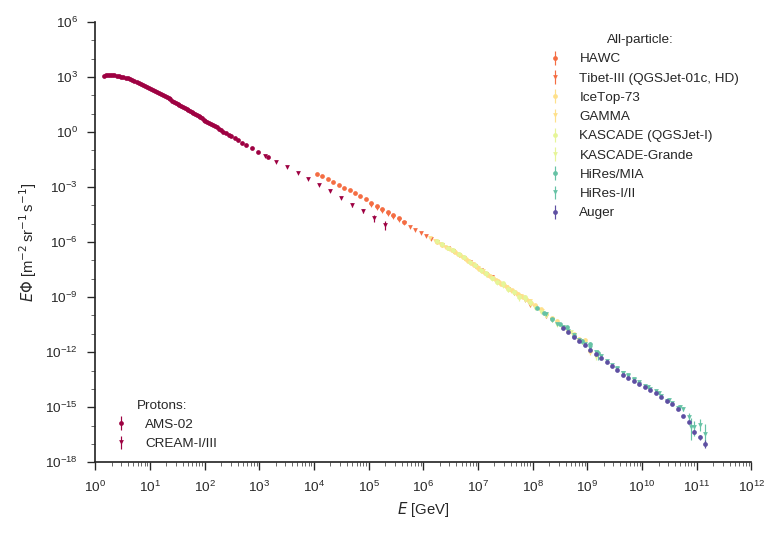

In [5]:
fig = matplotlib.pyplot.figure()

In [6]:
gridspec = matplotlib.pyplot.GridSpec(nrows=1, ncols=1)

In [7]:
ax = fig.add_subplot(gridspec[0, 0])

In [8]:
experiments = [
    "AMS-02", "CREAM-I/III (protons)", "HAWC", "Tibet-III (QGSJet-01c, HD)", "IceTop-73", "GAMMA",
    "KASCADE (QGSJet-I)", "KASCADE-Grande", "HiRes/MIA", "HiRes-I/II", "Auger",
    ]

In [9]:
prop_cycle = (
    cycler.cycler(color=matplotlib.cm.Spectral(matplotlib.colors.Normalize(vmin=0, vmax=5)(range(6)))) *
    cycler.cycler(marker=["o", "v"])
    )

In [10]:
matplotlib.rcParams["lines.markersize"] *= 0.5
matplotlib.rcParams["lines.linewidth"] *= 0.5

In [11]:
database = crspectra.CRSpectra()

In [12]:
for experiment, props in zip(experiments, prop_cycle()):
    if experiment == "AMS-02":
        data = database.from_external("AMS02", element="H", energy="ETOT")
    elif experiment == "HiRes-I/II":
        data = numpy.hstack((database.request("HiRes-I"), database.request("HiRes-II")))
    else:
        data = database.request(experiment)
    
    data = data[~data["uplim"]]
    
    if experiment == "CREAM-I/III (protons)":
        label = "CREAM-I/III"
    else:
        label = experiment
    
    ax.errorbar(
        data["energy"], data["flux"] * data["energy"], data["stat"].T * data["energy"],
        fmt=props["marker"], color=props["color"], label=label)

In [13]:
ax.loglog(nonposy="clip")

[]

In [14]:
ax.set_xlim(1., 1e12)
ax.set_ylim(1e-18, 1e6)

(1e-18, 1000000.0)

In [15]:
ax.xaxis.set_major_locator(matplotlib.ticker.LogLocator(numticks=14))
ax.xaxis.set_minor_locator(matplotlib.ticker.LogLocator(subs=range(1, 11), numticks=14))
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

In [16]:
ax.yaxis.set_minor_locator(matplotlib.ticker.LogLocator(numticks=27))
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

In [17]:
ax.set_xlabel(r"$E$ [GeV]")
ax.set_ylabel(r"$E \Phi$ [m$^{-2}\,$sr$^{-1}\,$s$^{-1}$]")

Text(0, 0.5, '$E \\Phi$ [m$^{-2}\\,$sr$^{-1}\\,$s$^{-1}$]')

In [18]:
handles, labels = ax.get_legend_handles_labels()

In [19]:
legend = ax.legend(handles[:2], labels[:2], loc="lower left", title="Protons:")
ax.add_artist(legend)

In [20]:
legend = ax.legend(handles[2:], labels[2:], loc="upper right", title="All-particle:")

In [21]:
gridspec.tight_layout(fig)

In [22]:
fig.savefig("crspectra.png")